In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
data = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
data.groupby('Hemisphere')['Heart Attack Risk'].mean()

Hemisphere
Northern Hemisphere    0.362721
Southern Hemisphere    0.349984
Name: Heart Attack Risk, dtype: float64

In [6]:
data.drop(['Patient ID', 'Country', 'Continent', 'Continent', 'Hemisphere'], axis = 1, inplace = True)

In [7]:
data.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

In [8]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

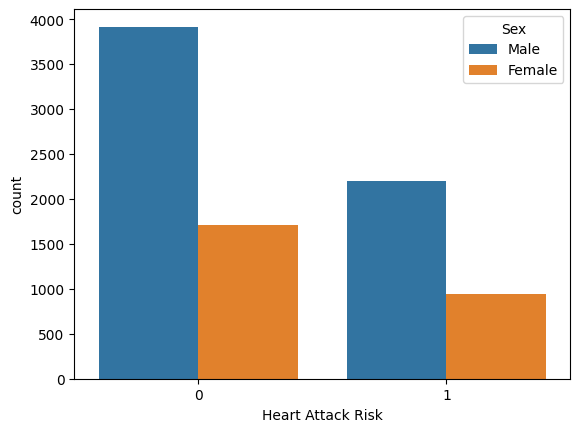

In [9]:
sns.countplot(x = 'Heart Attack Risk', data = data, hue = 'Sex')

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

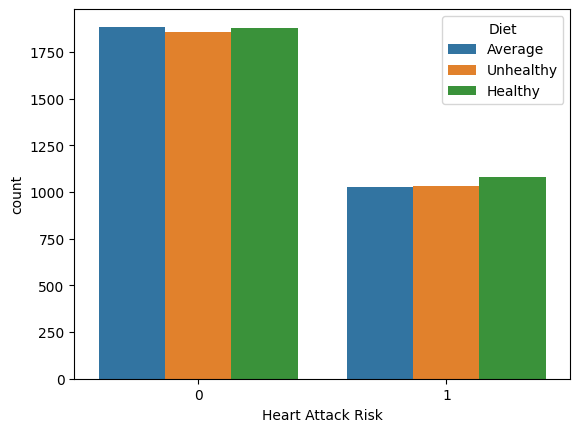

In [10]:
sns.countplot(x = 'Heart Attack Risk', data= data, hue = 'Diet')

In [11]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand = True).astype(int)

In [12]:
data['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [13]:
data.drop('Blood Pressure', axis = 1, inplace = True)

In [14]:
diet = {'Healthy': 0,
    'Average': 1,
    'Unhealthy': 2}
data['Diet'] = data['Diet'].map(diet)


In [15]:
data.drop('Sex', axis = 1, inplace = True)

<Axes: >

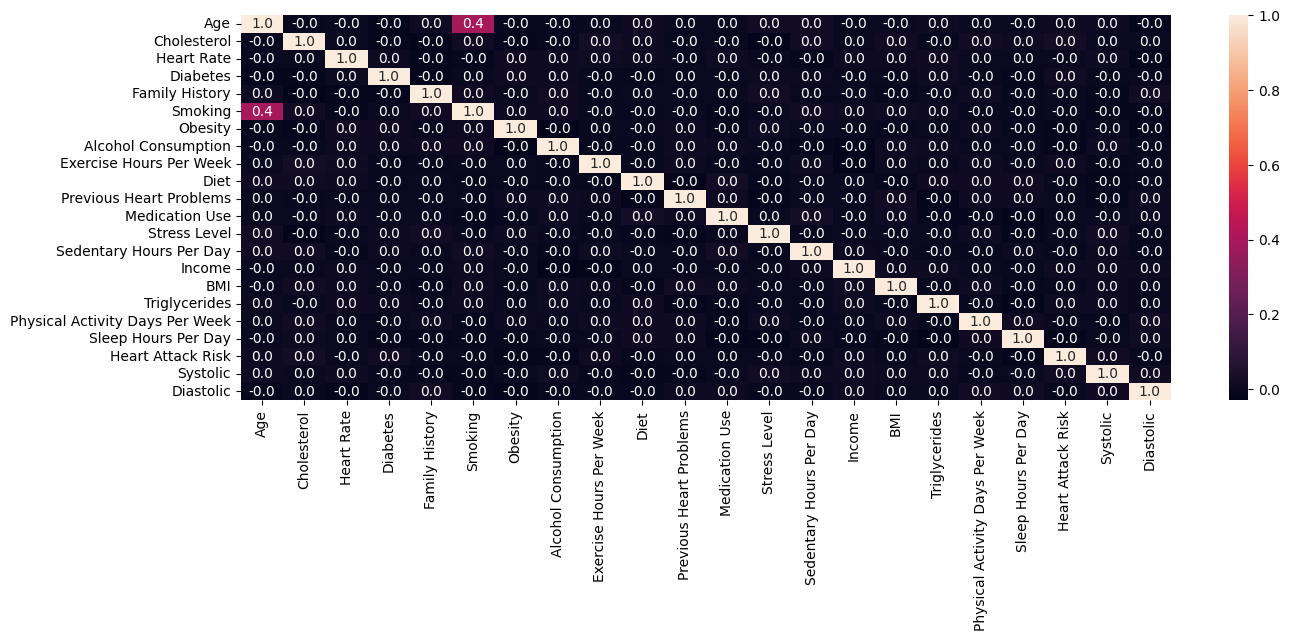

In [16]:
plt.figure(figsize = (15,5))
sns.heatmap(data.corr(), annot=True, fmt=".1f")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

In [18]:
data.drop(['Family History', 'Income'], axis = 1, inplace = True)

In [19]:
X = data.drop('Heart Attack Risk', axis = 1)
y = data['Heart Attack Risk']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[-1.16376264, -0.47681081,  1.11199657, ..., -0.51035259,
         1.59670845, -1.36804304],
       [-1.44645965, -0.76110369,  0.96582755, ..., -0.00746088,
        -0.98027226, -0.48434918],
       [ 0.43818709, -1.45329505,  0.42987451, ..., -1.51613603,
         1.48301812, -0.34839628],
       ...,
       [-0.45702011, -1.46565561,  1.01455056, ..., -0.51035259,
         0.72508262, -1.50399594],
       [-0.22143927, -0.42736857, -1.47032263, ...,  0.99832256,
        -0.71499484, -1.70792529],
       [-1.68204049, -1.14428105,  1.25816558, ..., -0.00746088,
         0.08083744, -0.21244338]])

In [23]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [24]:
y_pred = clf.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[1149,  604],
       [   0,    0]])

In [25]:
print(classification_report(y_pred, y_test, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      1753
           1       0.00      1.00      0.00         0

    accuracy                           0.66      1753
   macro avg       0.50      0.83      0.40      1753
weighted avg       1.00      0.66      0.79      1753



In [26]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = bayes.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[1149,  603],
       [   0,    1]])

In [28]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      1752
           1       0.00      1.00      0.00         1

    accuracy                           0.66      1753
   macro avg       0.50      0.83      0.40      1753
weighted avg       1.00      0.66      0.79      1753



In [29]:
classifier = DecisionTreeClassifier()


In [30]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'], 
    'max_depth': [2, 3, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [31]:
dt_classifier = GridSearchCV(classifier, param_grid = params, cv = 5)

In [32]:
dt_classifier.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [33]:
dt_classifier.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [34]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, max_features = 'log2', splitter = 'random')

In [35]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2',
                       splitter='random')

In [36]:
y_pred = clf.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[1149,  604],
       [   0,    0]])

In [37]:
print(classification_report(y_pred, y_test, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      1753
           1       0.00      1.00      0.00         0

    accuracy                           0.66      1753
   macro avg       0.50      0.83      0.40      1753
weighted avg       1.00      0.66      0.79      1753

